# Statistical Analytics Project

**Business Question:**
*What are factors that drive job satisfaction?*

- Data: *Train.csv*
- Source: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=train.csv


**NOTE**: *All Hypothesis Tests will use a Significace Level of $\alpha$ = 0.05*

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Loading data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


## Data Cleaning

In [3]:
df.shape

(59598, 24)

In [4]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Dropping:
- `Employee ID` as it is useless to our analysis
- `Attrition` as it is unrelated to our analysis


In [5]:
df = df.drop(['Employee ID', 'Attrition'], axis=1)

In [6]:
df['Age'].describe()

count    59598.000000
mean        38.565875
std         12.079673
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64

In [7]:
bins = [17, 27, 38, 48, 59]
labels = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [8]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Age Group
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Adult
1,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Senior
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Young Adult
3,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Adult
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Senior


## Descriptive Analysis

### Univariate Analysis

Taking a look at the distributions of some variables

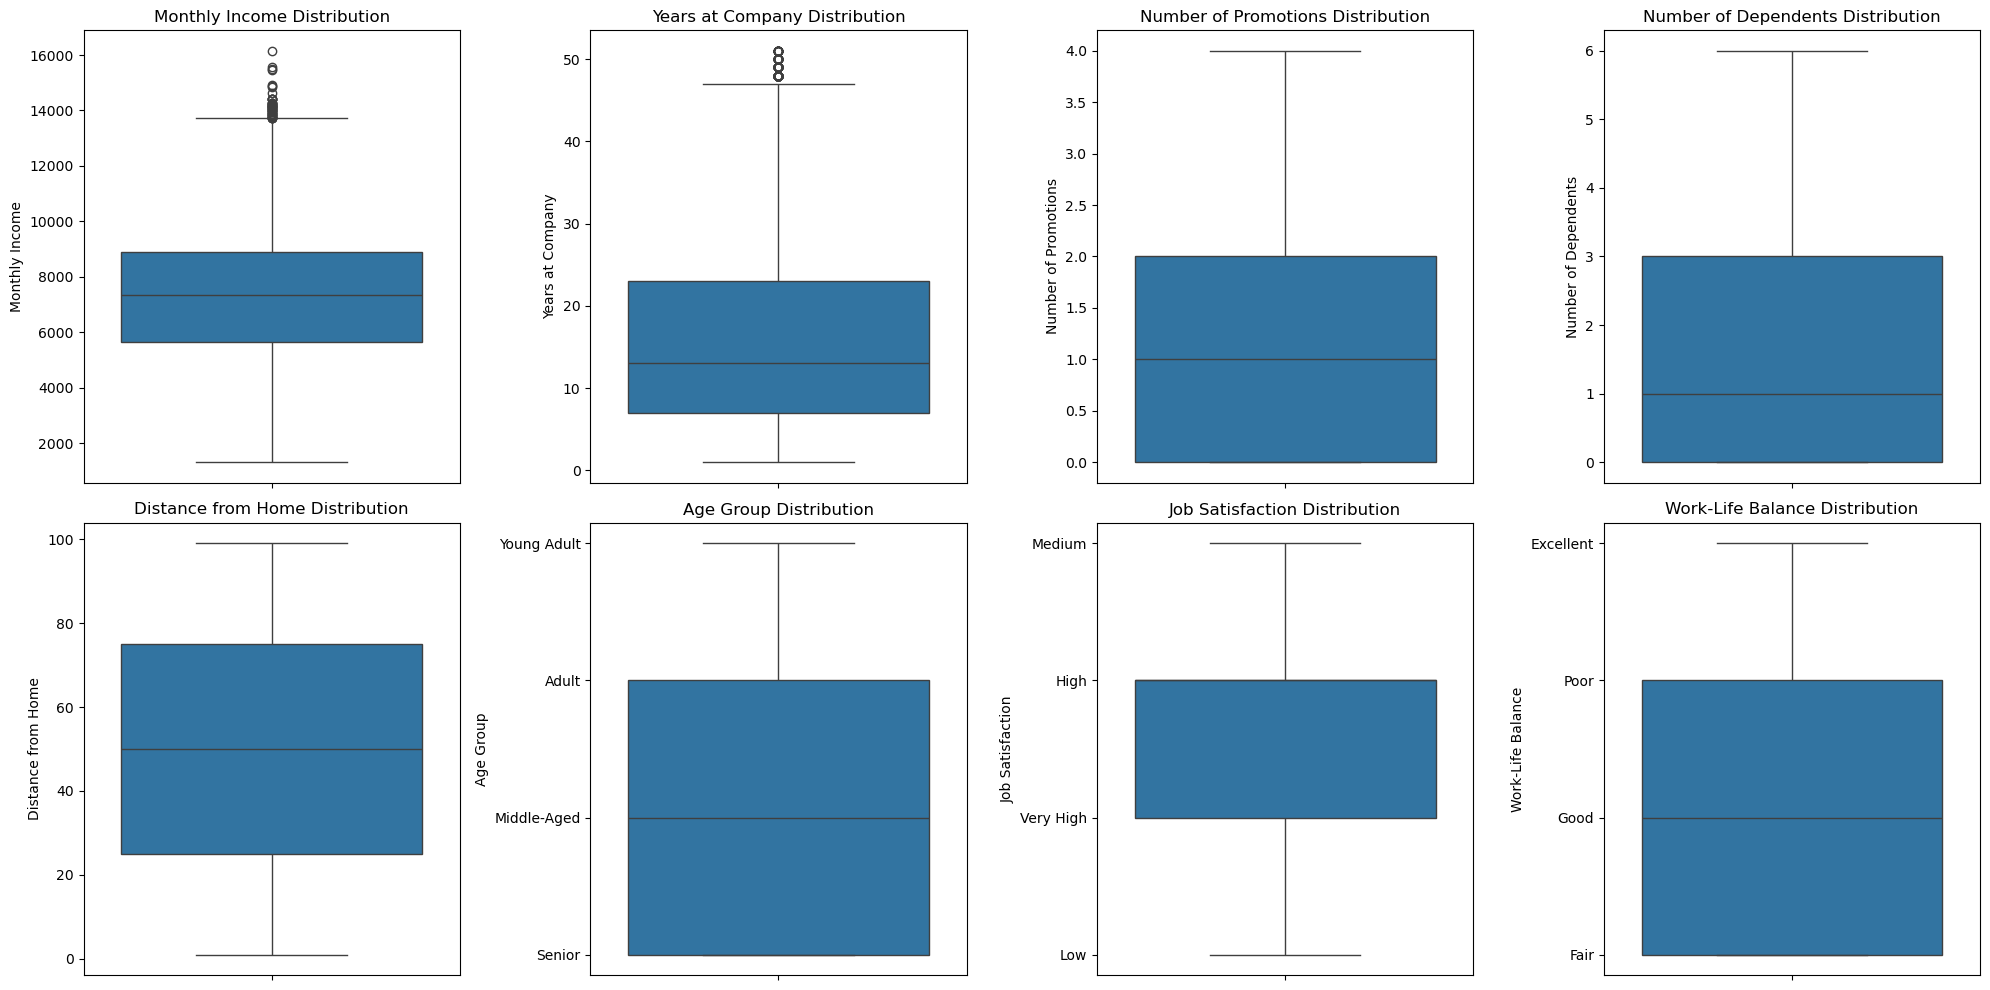

In [9]:
variables = ['Monthly Income', 'Years at Company',
             'Number of Promotions', 'Number of Dependents',
             'Distance from Home', 'Age Group', 'Job Satisfaction',
            'Work-Life Balance']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'{var} Distribution')

plt.tight_layout()
plt.show()

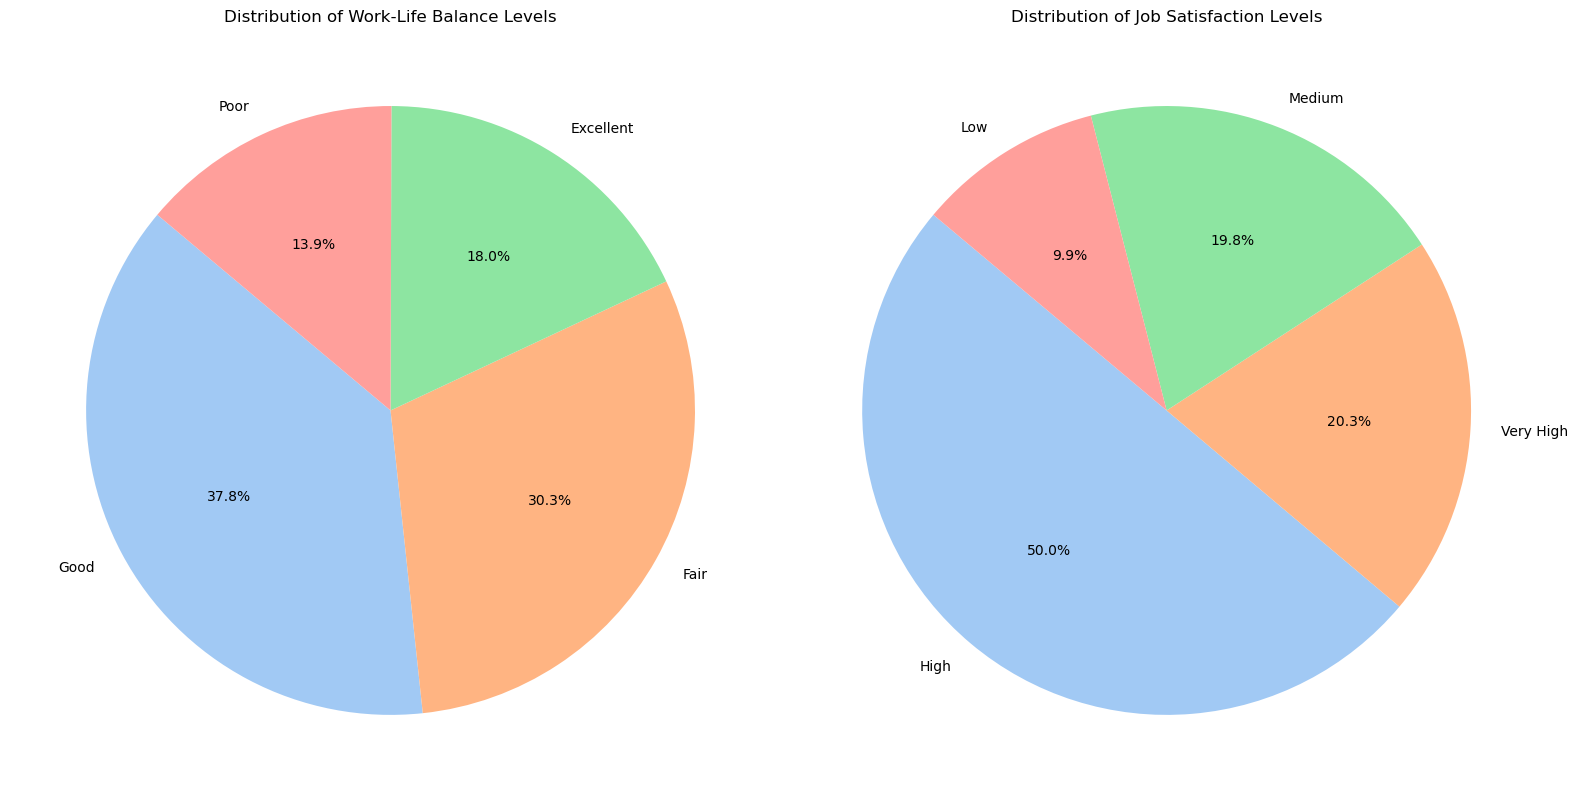

In [10]:
wlb_counts = df['Work-Life Balance'].value_counts()
js_counts = df['Job Satisfaction'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(
    wlb_counts,
    labels=wlb_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', len(wlb_counts))
)
axes[0].set_title('Distribution of Work-Life Balance Levels')

axes[1].pie(
    js_counts,
    labels=js_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', len(js_counts))
)
axes[1].set_title('Distribution of Job Satisfaction Levels')

plt.tight_layout()
plt.show()

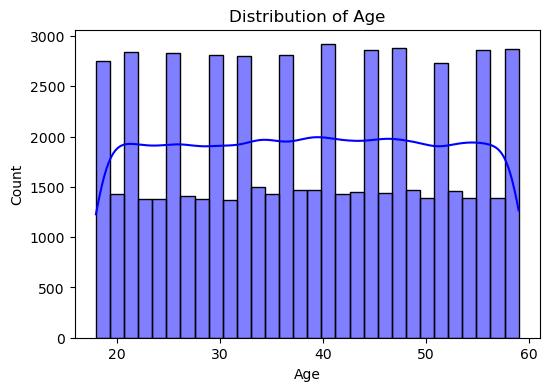

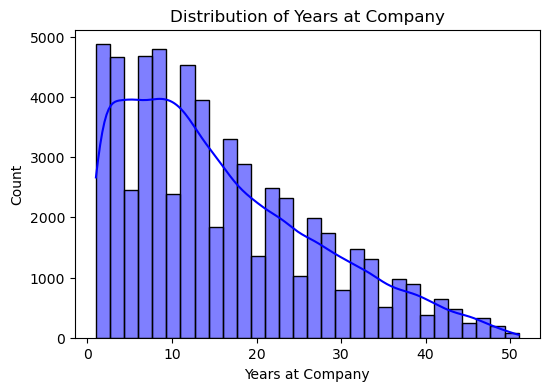

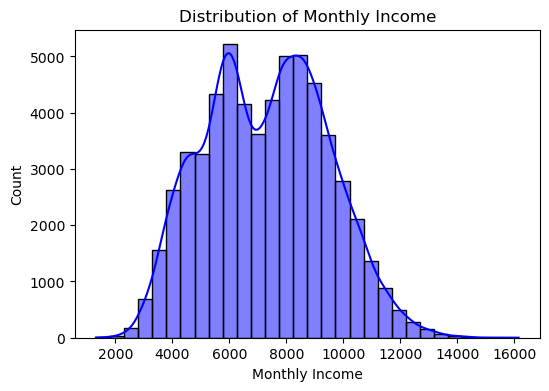

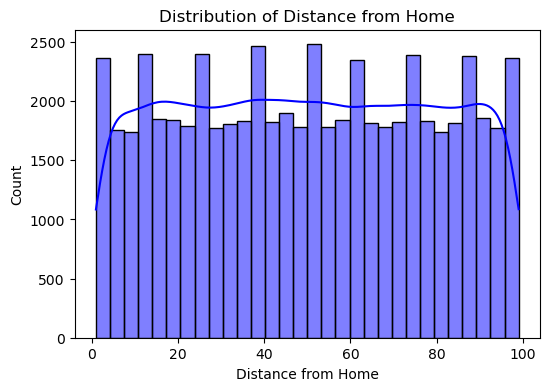

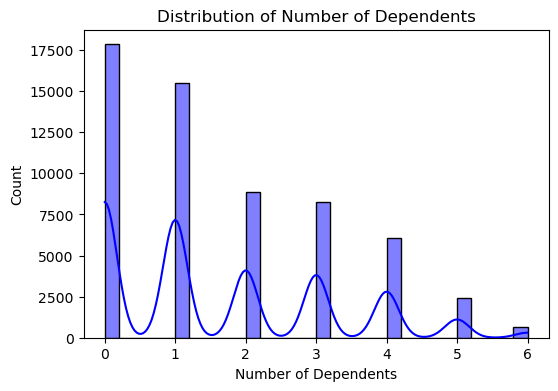

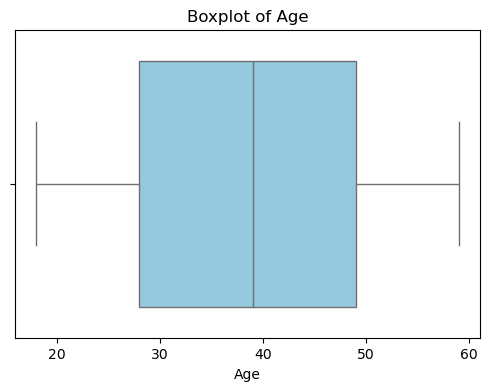

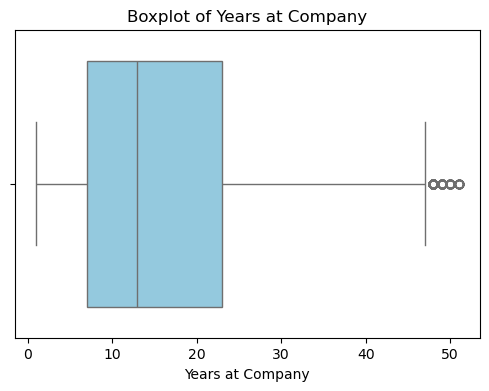

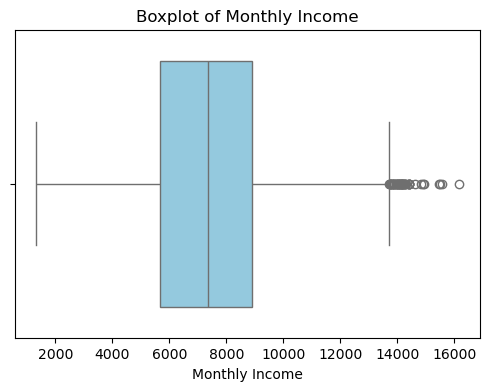

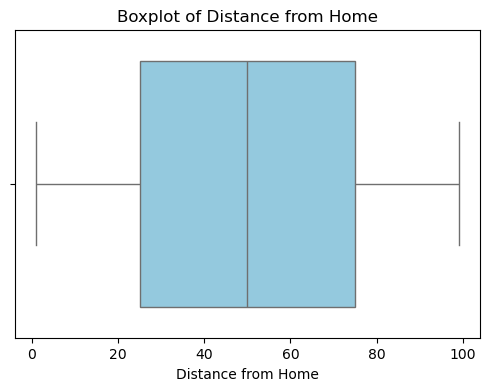

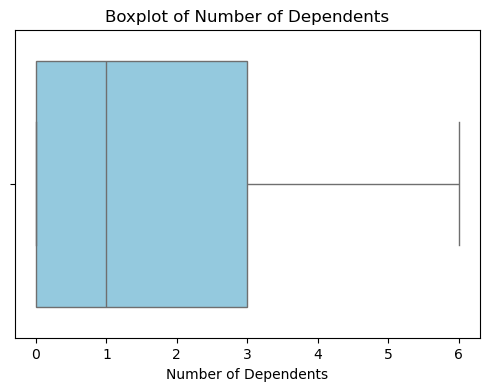

In [11]:
numerical_vars = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Dependents']
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for outliers
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

### Bivariate Analysis

Distribution of Job Satisfaction by categories

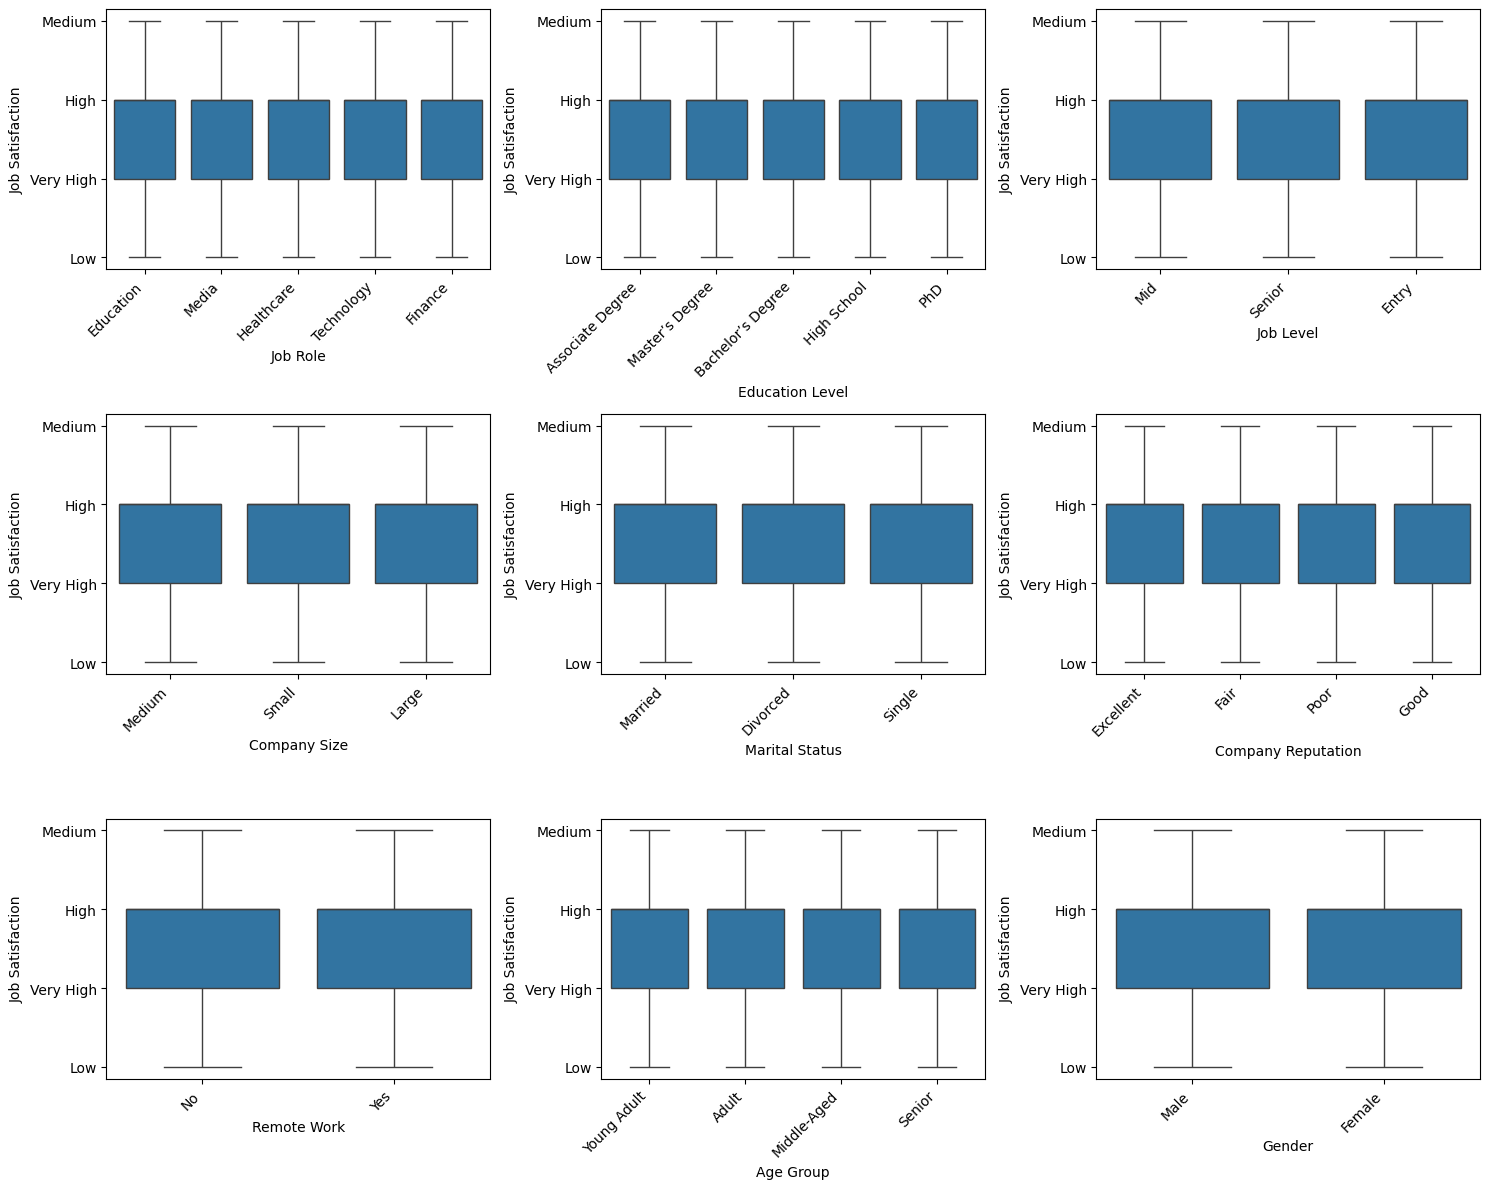

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.boxplot(data=df, x='Job Role', y='Job Satisfaction', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Education Level', y='Job Satisfaction', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Job Level', y='Job Satisfaction', ax=axes[0,2])
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Company Size', y='Job Satisfaction', ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Marital Status', y='Job Satisfaction', ax=axes[1,1])
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Company Reputation', y='Job Satisfaction', ax=axes[1,2])
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Remote Work', y='Job Satisfaction', ax=axes[2,0])
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Age Group', y='Job Satisfaction', ax=axes[2,1])
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(data=df, x='Gender', y='Job Satisfaction', ax=axes[2,2])
axes[2,2].set_xticklabels(axes[2,2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [13]:
#To further investigate the effect interaction between two terms, we are going to use point plot.

In [19]:
#Creating groups for income
mean_income = df['Monthly Income'].mean()
std_income = df['Monthly Income'].std()

# Define thresholds based on standard deviations
low_income_threshold = mean_income - std_income  
high_income_threshold = mean_income + std_income  

# Categorize income levels
def categorize_income(income):
    if income < low_income_threshold:
        return 'Low Income'
    elif low_income_threshold <= income < mean_income:
        return 'Lower-Middle Income'
    elif mean_income <= income < high_income_threshold:
        return 'Upper-Middle Income'
    else:
        return 'High Income'

df['Income Level'] = df['Monthly Income'].apply(categorize_income)

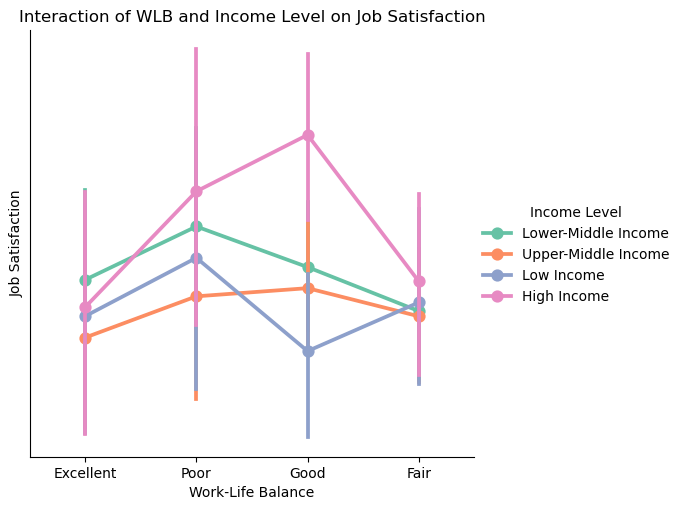

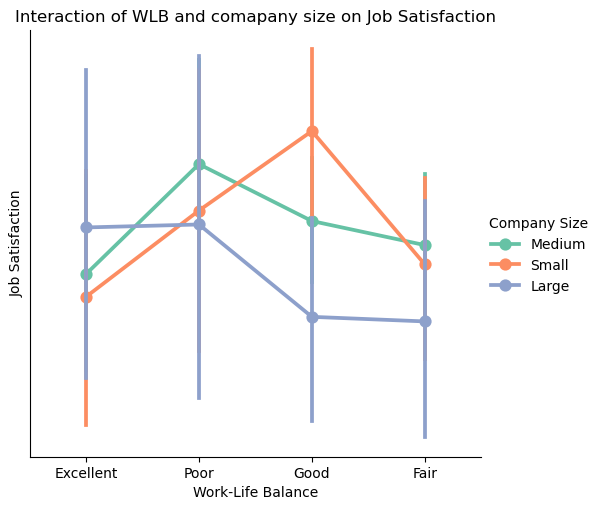

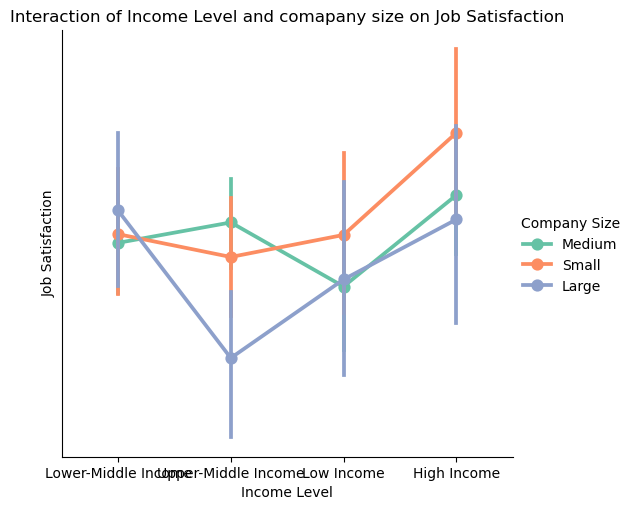

In [20]:
# Interaction effect of Work-Life Balance and Income on Job Satisfaction
sns.catplot(
    data=df, x='Work-Life Balance', y='Job Satisfaction', hue='Income Level', kind='point', palette='Set2'
)
plt.title("Interaction of WLB and Income Level on Job Satisfaction")
plt.show()

# Interaction effect of Work-Life Balance and Comapany Size on Job Satisfaction
sns.catplot(
    data=df, x='Work-Life Balance', y='Job Satisfaction', hue='Company Size', kind='point', palette='Set2'
)
plt.title("Interaction of WLB and comapany size on Job Satisfaction")
plt.show()

# Interaction effect of Work-Life Balance and Income on Job Satisfaction
sns.catplot(
    data=df, x='Income Level', y='Job Satisfaction', hue='Company Size', kind='point', palette='Set2'
)
plt.title("Interaction of Income Level and comapany size on Job Satisfaction")
plt.show()


### Encoding Features

In [21]:
work_life_map = {'Good': 1, 'Fair': 0, 'Excellent': 2, 'Poor':-1}
performance_rating_map = {'High': 2, 'Average': 1, 'Below Average': 0, 'Low':-1}
education_map = {'High School': 0, 'Associate Degree': 1, 'Bachelor’s Degree': 2,
                 'Master’s Degree': 3, 'PhD': 4}
job_level_map = {'Entry': 0, 'Mid': 1, 'Senior': 2}
company_size_map = {'Small': 0, 'Medium': 1, 'Large': 2}
company_reputation_map = {'Good': 1, 'Fair': 0, 'Excellent': 2, 'Poor':-1}
employee_recognition_map = {'Very High': 3, 'High': 2, 'Medium': 1, 'Low': 0}
job_satisfaction_map = {'Very High': 3, 'High': 2, 'Medium': 1, 'Low': 0}

df['Job Satisfaction'] = df['Job Satisfaction'].replace(job_satisfaction_map)
df['Work-Life Balance'] = df['Work-Life Balance'].replace(work_life_map)
df['Performance Rating'] = df['Performance Rating'].replace(performance_rating_map)
df['Education Level'] = df['Education Level'].replace(education_map)
df['Job Level'] = df['Job Level'].replace(job_level_map)
df['Company Size'] = df['Company Size'].replace(company_size_map)
df['Company Reputation'] = df['Company Reputation'].replace(company_reputation_map)
df['Employee Recognition'] = df['Employee Recognition'].replace(employee_recognition_map)

binary_columns = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Left' else 0)

marital_dummies = pd.get_dummies(df['Marital Status'], prefix='Marital')
df = pd.concat([df, marital_dummies], axis=1)

In [22]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Age Group,Income Level,Marital_Divorced,Marital_Married,Marital_Single
0,31,Male,19,Education,5390,2,1,1,2,0,22,1,Married,0,1,1,89,0,0,0,2,1,Adult,Lower-Middle Income,False,True,False
1,59,Female,4,Media,5534,-1,2,-1,3,0,21,3,Divorced,3,1,1,21,0,0,0,0,0,Senior,Lower-Middle Income,True,False,False
2,24,Female,10,Healthcare,8159,1,2,-1,0,0,11,2,Married,3,1,1,74,0,0,0,-1,0,Young Adult,Upper-Middle Income,False,True,False
3,36,Female,7,Education,3989,1,2,2,1,0,27,0,Single,2,1,0,50,1,0,0,1,1,Adult,Low Income,False,False,True
4,56,Male,41,Education,4821,0,3,1,0,1,71,0,Divorced,0,2,1,68,0,0,0,0,1,Senior,Low Income,True,False,False


Below, we can see the distribution of Job Satisfaction based on certain columns

In [23]:
print("Descriptive Statistics for Job Satisfaction:")
print(df['Job Satisfaction'].describe())
print('*' * 73)
for column in ['Gender', 'Job Role', 'Education Level',
               'Job Level', 'Company Size', 'Marital Status',
              'Age Group', 'Remote Work']:
    print(f"\nDescriptive Statistics by {column}:")
    print(df.groupby(column)['Job Satisfaction'].describe())
    print('*' * 73)

Descriptive Statistics for Job Satisfaction:
count    59598.000000
mean         1.807242
std          0.871625
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Job Satisfaction, dtype: float64
*************************************************************************

Descriptive Statistics by Gender:
          count      mean       std  min  25%  50%  75%  max
Gender                                                      
Female  26859.0  1.802003  0.870604  0.0  1.0  2.0  2.0  3.0
Male    32739.0  1.811540  0.872451  0.0  1.0  2.0  2.0  3.0
*************************************************************************

Descriptive Statistics by Job Role:
              count      mean       std  min  25%  50%  75%  max
Job Role                                                        
Education   12490.0  1.824980  0.868087  0.0  1.0  2.0  2.0  3.0
Finance      8385.0  1.793083  0.868501  0.0  1.0  2.0  2.0  3.0
Healthcare  1364

Now we will take a look at certain features more in depth

### `Marital Status`

Count of Job satisfactions:
Job Satisfaction     0     1      2     3  Total
marital_binary                                  
Married           2944  5924  14873  6167  29908
Single            2947  5893  14906  5944  29690
**************************************************
Proportion of Job satisfactions:
Job Satisfaction         0          1          2          3  Total
marital_binary                                                    
Married           9.843520  19.807409  49.729169  20.619901  100.0
Single            9.925901  19.848434  50.205456  20.020209  100.0


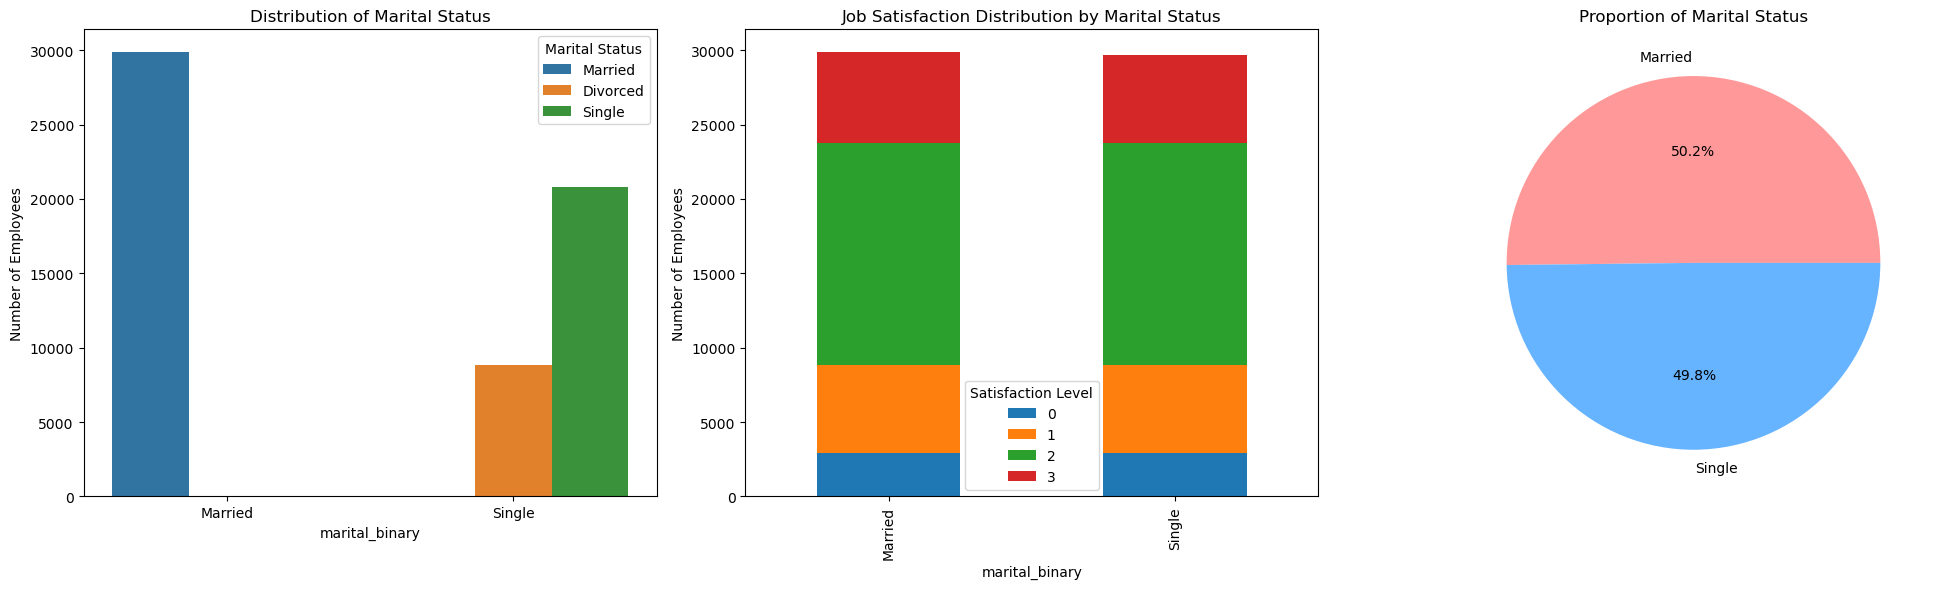

In [24]:
def analyze_marital_satisfaction(df):
    """
    Analyze relationship between marital status and job satisfaction with value counts and pie charts
    """

    # Create binary marital status
    df['marital_binary'] = df['Marital Status'].map({'Married': 'Married',
                                                    'Single': 'Single',
                                                    'Divorced': 'Single'})
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

    # 1. Count plot for overall distribution
    sns.countplot(data=df, x='marital_binary', hue ='Marital Status', ax=ax1)
    ax1.set_title('Distribution of Marital Status')
    ax1.set_ylabel('Number of Employees')

    # 2. Count plot for satisfaction levels by marital status
    satisfaction_counts = df.groupby(['marital_binary', 'Job Satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Job Satisfaction Distribution by Marital Status')
    ax2.set_ylabel('Number of Employees')
    ax2.legend(title='Satisfaction Level')

    # 3. Pie chart for marital status distribution
    marital_counts = df['marital_binary'].value_counts()
    ax3.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff'])
    ax3.set_title('Proportion of Marital Status')

    plt.tight_layout()

    # Calculate detailed statistics
    stats_df = df.groupby(['marital_binary', 'Job Satisfaction']).size().unstack()
    stats_df['Total'] = stats_df.sum(axis=1)
    stats_df_pct = stats_df.div(stats_df['Total'], axis=0) * 100

    return stats_df, stats_df_pct

# Run analysis
df_copy = df.copy()
stats_count, stats_percent = analyze_marital_satisfaction(df_copy)

print("Count of Job satisfactions:")
print(stats_count)
print('*' * 50)
print("Proportion of Job satisfactions:")
print(stats_percent)

In analyzing the relationship between marital status and job satisfaction, we created three visualizations to understand the patterns. The first count plot breaks down employee distribution between married, single, and divorced employees, though we simplified this into a binary married vs. single (including divorced) classification for deeper analysis. A stacked bar chart and pie chart reveal that our workforce is almost perfectly split between married (50.2%) and single (49.8%) employees, and interestingly, both groups show nearly identical job satisfaction levels hovering around 2.8 (between Medium and High). This suggests that marital status has virtually no impact on how satisfied employees are with their jobs.

### `Distance from Home`

Count of Job satisfactions:
Job Satisfaction     0     1      2     3  Total
distance_bracket                                
0-5 miles          307   585   1459   602   2953
6-10 miles         277   616   1448   575   2916
11-20 miles        592  1200   3060  1233   6085
21-30 miles        575  1232   2998  1164   5969
30+ miles         4140  8184  20814  8537  41675
**************************************************
Proportion of Job satisfactions:
Job Satisfaction          0          1          2          3  Total
distance_bracket                                                   
0-5 miles         10.396207  19.810362  49.407382  20.386048  100.0
6-10 miles         9.499314  21.124829  49.657064  19.718793  100.0
11-20 miles        9.728841  19.720624  50.287592  20.262942  100.0
21-30 miles        9.633104  20.639973  50.226169  19.500754  100.0
30+ miles          9.934013  19.637672  49.943611  20.484703  100.0


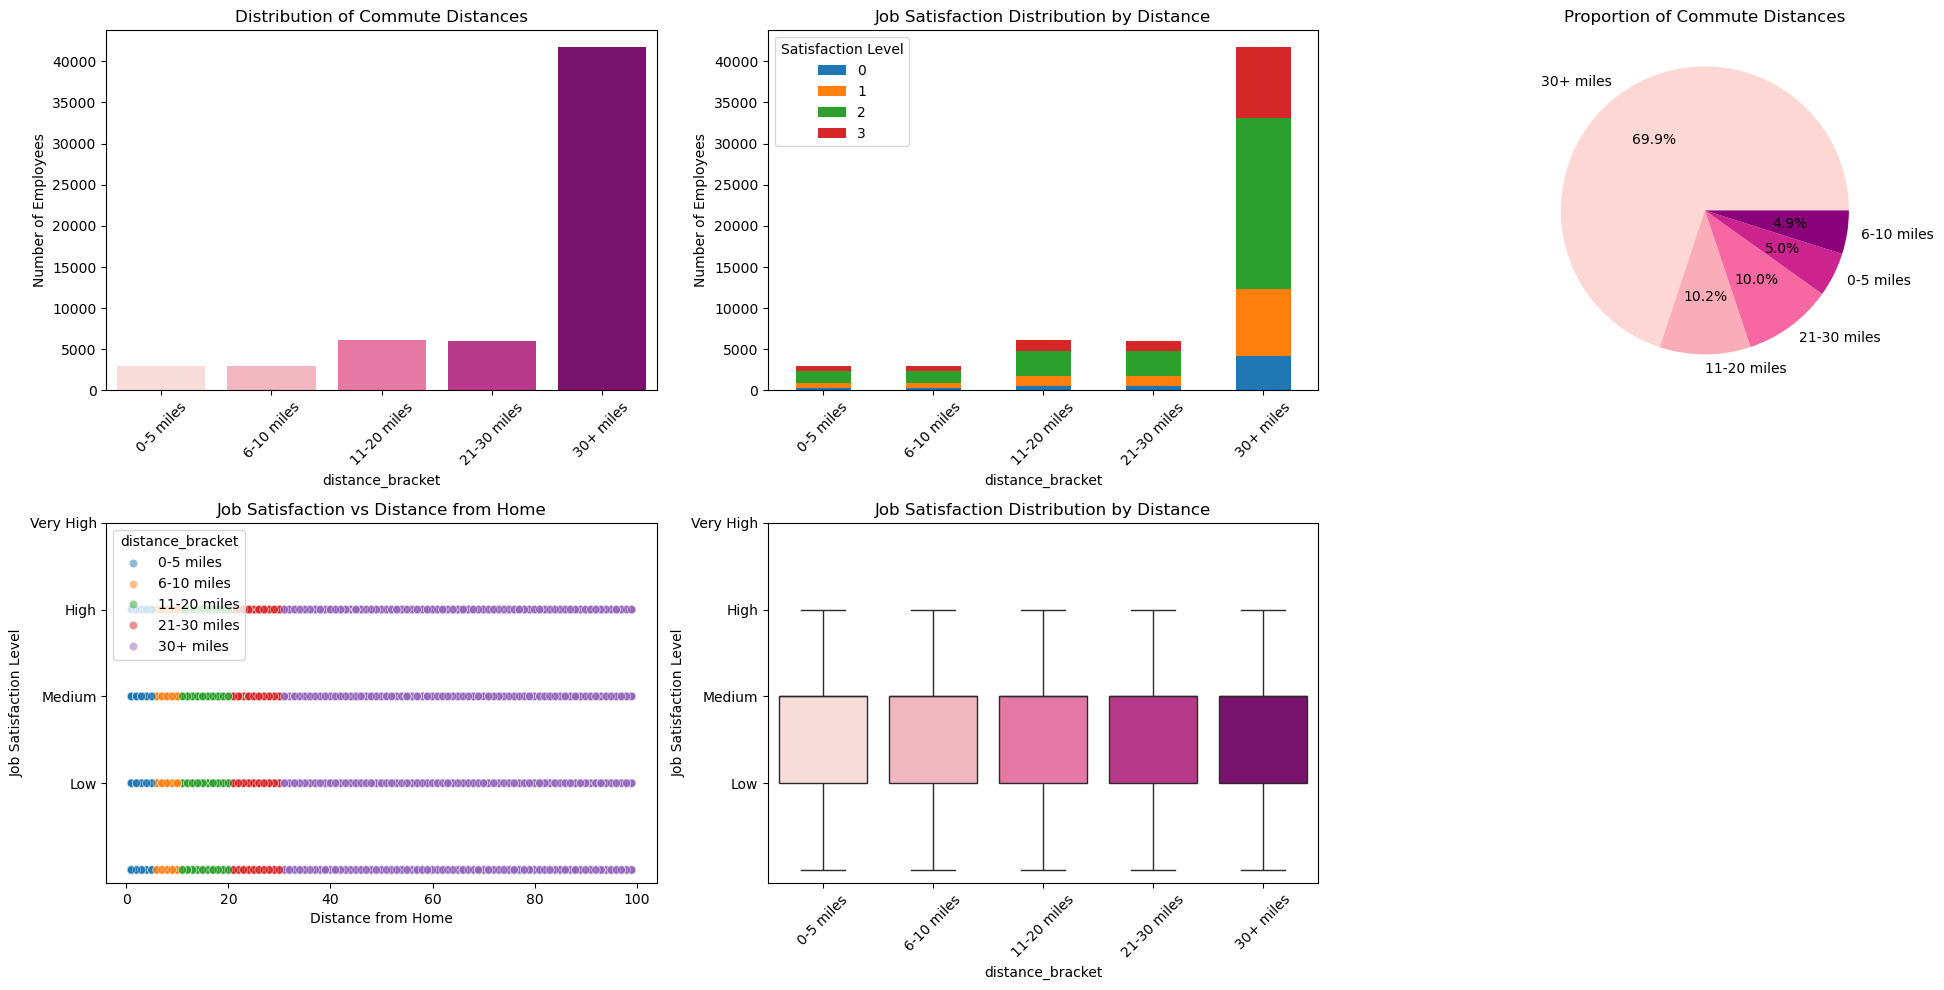

In [25]:
def analyze_distance(df):
    """
    Analyze relationship between distance from home and job satisfaction with value counts and pie charts
    """

    # Create distance brackets
    df['distance_bracket'] = pd.cut(df['Distance from Home'],
                                  bins=[0, 5, 10, 20, 30, float('inf')],
                                  labels=['0-5 miles', '6-10 miles', '11-20 miles',
                                        '21-30 miles', '30+ miles'])

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 10))

    # 1. Count plot for distance brackets
    ax1 = plt.subplot(231)
    sns.countplot(data=df, x='distance_bracket', palette='RdPu', ax=ax1)
    ax1.set_title('Distribution of Commute Distances')
    ax1.set_ylabel('Number of Employees')
    ax1.tick_params(axis='x', rotation=45)

    # 2. Stacked bar chart for satisfaction levels by distance
    ax2 = plt.subplot(232)
    satisfaction_counts = df.groupby(['distance_bracket', 'Job Satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Job Satisfaction Distribution by Distance')
    ax2.set_ylabel('Number of Employees')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Satisfaction Level')

    # 3. Pie chart for distance distribution
    ax3 = plt.subplot(233)
    distance_counts = df['distance_bracket'].value_counts()
    ax3.pie(distance_counts, labels=distance_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('RdPu', n_colors=5))
    ax3.set_title('Proportion of Commute Distances')

    # 4. Scatter plot
    ax4 = plt.subplot(234)
    sns.scatterplot(data=df, x='Distance from Home', y='Job Satisfaction',
                    alpha=0.5, hue='distance_bracket', ax=ax4)
    ax4.set_ylabel('Job Satisfaction Level')
    ax4.set_yticks([1, 2, 3, 4])
    ax4.set_yticklabels(['Low', 'Medium', 'High', 'Very High'])
    ax4.set_title('Job Satisfaction vs Distance from Home')

    # 5. Box plot
    ax5 = plt.subplot(235)
    sns.boxplot(data=df, x='distance_bracket', y='Job Satisfaction',
                palette='RdPu', ax=ax5)
    ax5.set_ylabel('Job Satisfaction Level')
    ax5.set_yticks([1, 2, 3, 4])
    ax5.set_yticklabels(['Low', 'Medium', 'High', 'Very High'])
    ax5.set_title('Job Satisfaction Distribution by Distance')
    ax5.tick_params(axis='x', rotation=45)

    plt.tight_layout()

    # Calculate detailed statistics
    stats_count = df.groupby(['distance_bracket', 'Job Satisfaction']).size().unstack()
    stats_count['Total'] = stats_count.sum(axis=1)
    stats_percent = stats_count.div(stats_count['Total'], axis=0) * 100

    return stats_count, stats_percent

# Run analysis
df_copy = df.copy()
stats_count, stats_percent = analyze_distance(df)

print("Count of Job satisfactions:")
print(stats_count)
print('*' * 50)
print("Proportion of Job satisfactions:")
print(stats_percent)

In analyzing how commute distance affects job satisfaction, we created five visualization types and categorized distances into brackets from 0-5 to 30+ miles. Our analysis revealed that while most employees commute more than 30 miles, job satisfaction remains remarkably consistent across all distance groups, with average satisfaction levels around 2.8 (between Medium and High) regardless of commute length. This unexpected finding suggests that commute distance has minimal impact on how satisfied employees are with their jobs.


### `Company Size`

Count of Job satisfactions:
Job Satisfaction     0     1      2     3  Total
Company Size                                    
0                 1764  3559   9051  3561  17935
1                 2953  5946  14829  6017  29745
2                 1174  2312   5899  2533  11918
**************************************************
Proportion of Job satisfactions:
Job Satisfaction         0          1          2          3  Total
Company Size                                                      
0                 9.835517  19.843881  50.465570  19.855032  100.0
1                 9.927719  19.989914  49.853757  20.228610  100.0
2                 9.850646  19.399228  49.496560  21.253566  100.0


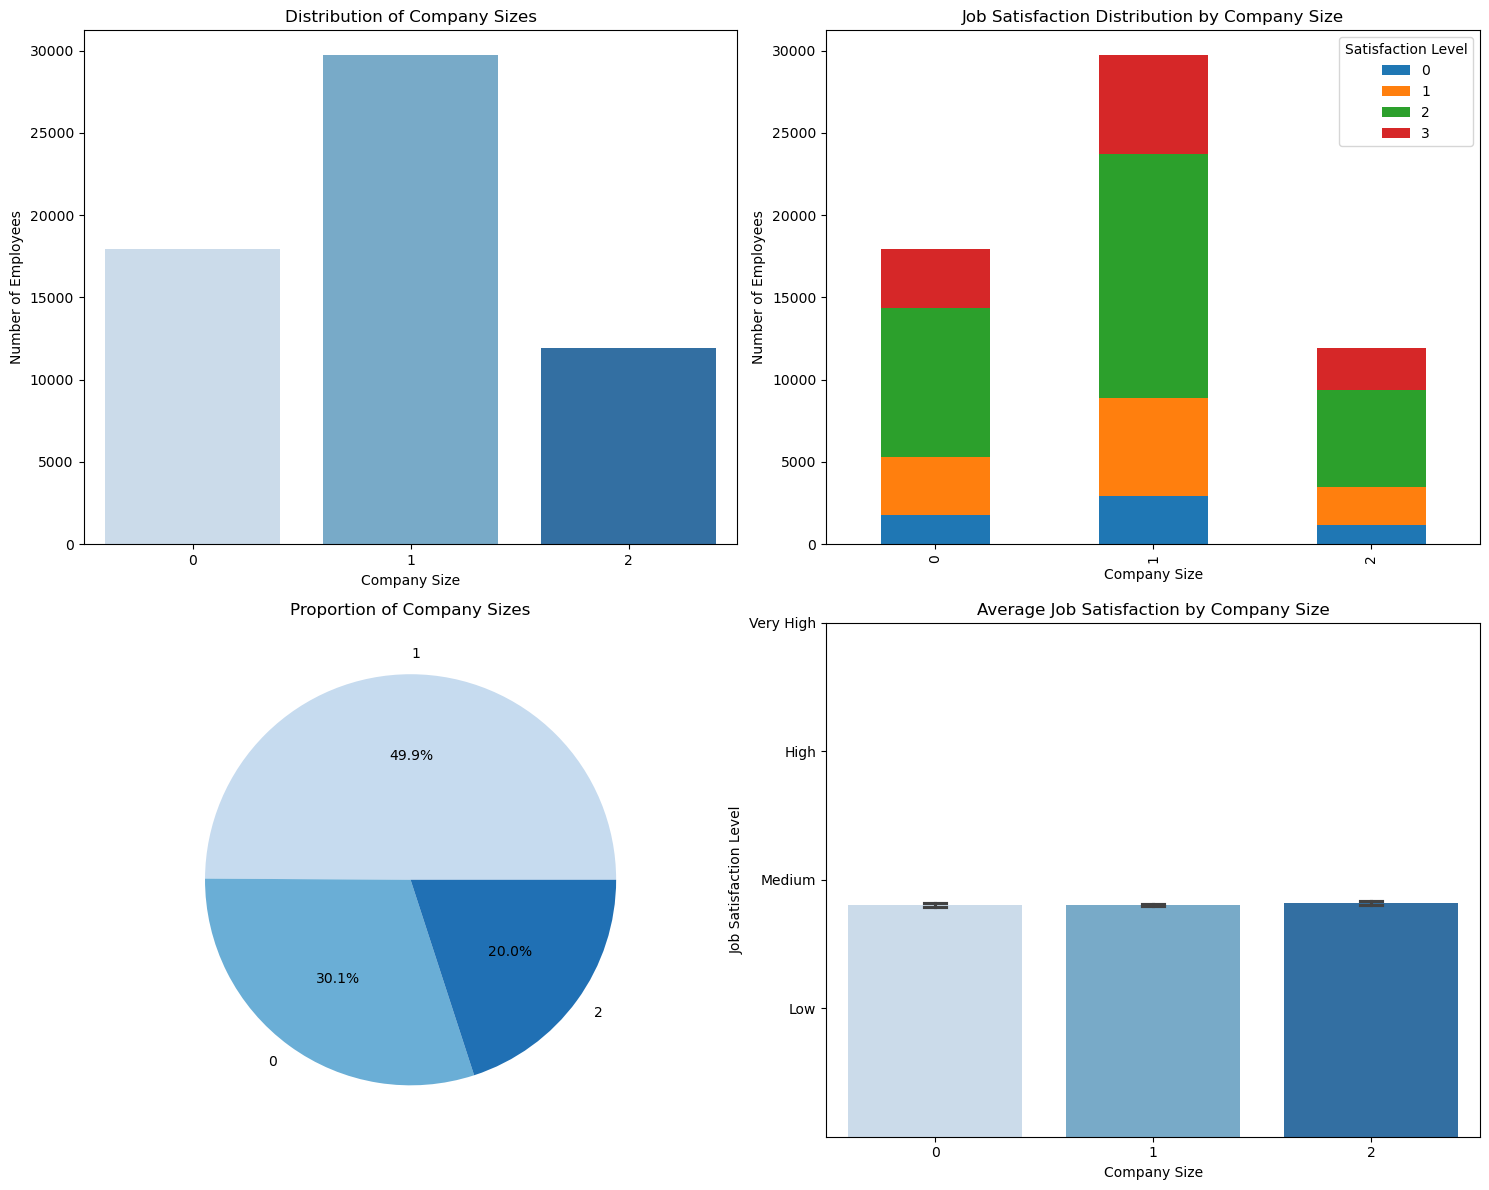

In [26]:
def analyze_company_size(df):
    """
    Analyze relationship between company size and job satisfaction with value counts and pie charts
    """
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Count plot for company sizes
    sns.countplot(data=df, x='Company Size', palette='Blues', ax=ax1)
    ax1.set_title('Distribution of Company Sizes')
    ax1.set_ylabel('Number of Employees')

    # 2. Stacked bar chart for satisfaction levels by company size
    satisfaction_counts = df.groupby(['Company Size', 'Job Satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Job Satisfaction Distribution by Company Size')
    ax2.set_ylabel('Number of Employees')
    ax2.legend(title='Satisfaction Level')

    # 3. Pie chart for company size distribution
    size_counts = df['Company Size'].value_counts()
    ax3.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Blues', n_colors=3))
    ax3.set_title('Proportion of Company Sizes')

    # 4. Bar plot with error bars
    sns.barplot(x='Company Size', y='Job Satisfaction', data=df,
                palette='Blues', capsize=0.1, errorbar=('ci', 95), ax=ax4)
    ax4.set_title('Average Job Satisfaction by Company Size')
    ax4.set_ylabel('Job Satisfaction Level')
    ax4.set_yticks([1, 2, 3, 4])
    ax4.set_yticklabels(['Low', 'Medium', 'High', 'Very High'])

    plt.tight_layout()

    # Calculate detailed statistics

    stats_count = df.groupby(['Company Size', 'Job Satisfaction']).size().unstack()
    stats_count['Total'] = stats_count.sum(axis=1)
    stats_percent = stats_count.div(stats_count['Total'], axis=0) * 100

    return stats_count, stats_percent

# Run analysis
df_copy = df.copy()
stats_count, stats_percent = analyze_company_size(df_copy)

print("Count of Job satisfactions:")
print(stats_count)
print('*' * 50)
print("Proportion of Job satisfactions:")
print(stats_percent)

Our analysis of company size's impact on job satisfaction utilized four different visualization methods to examine the relationship. While medium-sized companies employ the largest portion of workers, satisfaction levels remain consistently between Medium and High (averaging 2.8) across all company sizes. This suggests that the size of a company has minimal influence on how satisfied employees are with their jobs.

## Variable Selection

### Correlation Analysis

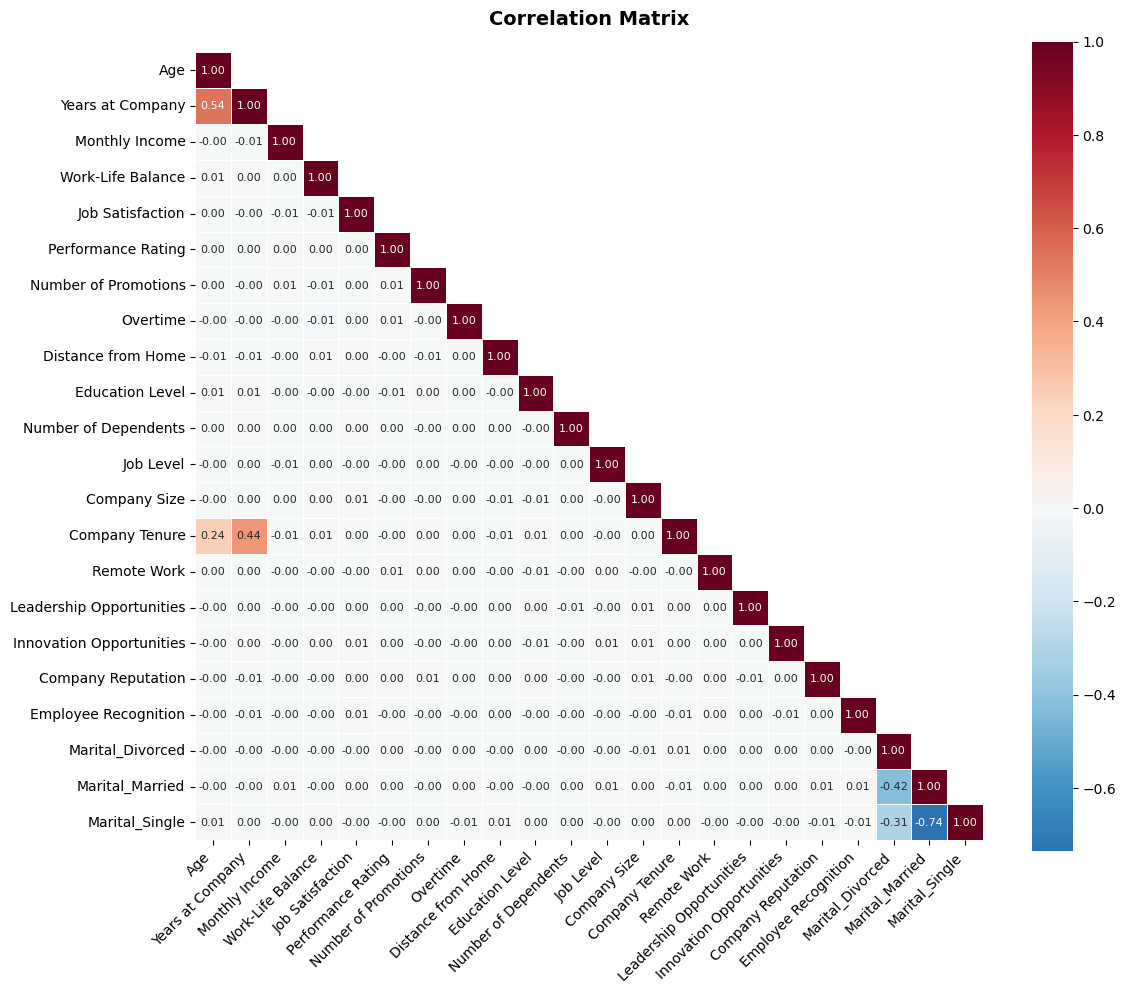

In [27]:
plt.figure(figsize=(12, 10))

corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix), k=1)

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            annot_kws={'size': 8})

plt.title('Correlation Matrix', pad=20, size=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Let's take a look at the top 10 correlated features

In [28]:
job_sat_corr = corr_matrix['Job Satisfaction'].abs().sort_values(ascending=False)
significant_correlations = job_sat_corr[1:11]
print("Top features, Correlation:")
significant_correlations

Top features, Correlation:


Innovation Opportunities    0.009090
Monthly Income              0.007708
Company Size                0.006573
Work-Life Balance           0.005977
Employee Recognition        0.005952
Number of Dependents        0.004815
Marital_Married             0.004621
Company Reputation          0.004451
Marital_Single              0.004436
Distance from Home          0.004039
Name: Job Satisfaction, dtype: float64

### Regression Analysis

In [29]:
numerical_features = ['Age', 'Years at Company',
       'Monthly Income', 'Work-Life Balance',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single']

y = df['Job Satisfaction']

feature_scores = {}
for feature in numerical_features:
    X = df[[feature]]
    Y = df['Job Satisfaction']
    scaler = StandardScaler()
    model = LinearRegression()
    X_scaled = scaler.fit_transform(X)

    model.fit(X_scaled,Y)
    feature_scores[feature] = round(model.coef_[0], 4)

Let's take a look at the top 10 features with biggest abs(coefficient)

In [30]:
print("Top features: abs(coefficient)")
significant_coefficients = pd.Series(feature_scores).abs().sort_values(ascending=False)[:10]
significant_coefficients

Top features: abs(coefficient)


Innovation Opportunities    0.0079
Monthly Income              0.0067
Company Size                0.0057
Work-Life Balance           0.0052
Employee Recognition        0.0052
Number of Dependents        0.0042
Marital_Married             0.0040
Marital_Single              0.0039
Company Reputation          0.0039
Distance from Home          0.0035
dtype: float64

### Random Forest Analysis

The following will utilize Random Forest model, which provides importance of each feature in determining the `Job Satisfaction` score

- Meaning it shows how important each feature is in the Random Forest Model
- The scores will add up to 1

In [31]:
numerical_cols = df.select_dtypes(include=['number']).columns
data = df[numerical_cols]

model = RandomForestRegressor()
features = data.drop('Job Satisfaction', axis = 1)
target = data['Job Satisfaction']

model.fit(features, target)

importances = model.feature_importances_
feature_importance = pd.Series(importances, index = features.columns).sort_values(ascending=False)
print(feature_importance)

Monthly Income              0.170426
Company Tenure              0.130597
Distance from Home          0.129642
Age                         0.105411
Years at Company            0.101322
Number of Dependents        0.049486
Education Level             0.043522
Number of Promotions        0.034740
Work-Life Balance           0.034731
Performance Rating          0.032734
Company Reputation          0.032555
Employee Recognition        0.031539
Company Size                0.027191
Job Level                   0.026417
Overtime                    0.015996
Remote Work                 0.014046
Innovation Opportunities    0.012104
Leadership Opportunities    0.007542
dtype: float64


In [32]:
feature_importance.sum()

1.0000000000000002

Now using the informations we have, we will pick 5 that we will work with

In [33]:
significant_correlations.index

Index(['Innovation Opportunities', 'Monthly Income', 'Company Size',
       'Work-Life Balance', 'Employee Recognition', 'Number of Dependents',
       'Marital_Married', 'Company Reputation', 'Marital_Single',
       'Distance from Home'],
      dtype='object')

In [34]:
significant_coefficients.index

Index(['Innovation Opportunities', 'Monthly Income', 'Company Size',
       'Work-Life Balance', 'Employee Recognition', 'Number of Dependents',
       'Marital_Married', 'Marital_Single', 'Company Reputation',
       'Distance from Home'],
      dtype='object')

In [35]:
feature_importance.index[:11]

Index(['Monthly Income', 'Company Tenure', 'Distance from Home', 'Age',
       'Years at Company', 'Number of Dependents', 'Education Level',
       'Number of Promotions', 'Work-Life Balance', 'Performance Rating',
       'Company Reputation'],
      dtype='object')

The selected features:

1. `Monthly Income`
2. `Work-Life Balance`
3. `Distance From Home`
4. `Company Size`
5. `Marital Status`

**NOTE**: Although `Distance From Home` did not appear in the above lists, we have included the variable as we hypothesize it may play a role in employee behavior, and our team was interested in investigating its significance.

## Statistical Testing

Now we will perform Two Sample tests and Chi Square tests to see if any of the variables are significant to `Job Satisfaction`

### Two Sample Testing

Creating a reusable function

Considering variance is similar *equal_vaar = True*
- when the ratio of the larger variance to the smaller variance is less than 2:1
- When the ratio of the larger sample size to the smaller sample size is less than 1.5:1


In [36]:
def two_sample_test(feature, df, visuals=True):
    group_high = df[df[feature] >= df[feature].median()]['Job Satisfaction']
    group_low = df[df[feature] < df[feature].median()]['Job Satisfaction']

    equal_vars = True
    var1 = group_high.var()
    var2 = group_low.var()
    if max(var1, var2) / min(var1, var2) >= 2:
        equal_vars = False

    len1 = len(group_high)
    len2 = len(group_low)

    if max(len1, len2) / min(len1, len2) >= 1.5:
        equal_vars = False

    t_stat, p_value = ttest_ind(group_high, group_low, equal_var=equal_vars)

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print(f"The difference in mean Job Satisfaction between the two {feature} groups is statistically significant.")
    else:
        print(f"The difference in mean Job Satisfaction between the two {feature} groups is not statistically significant.")

    if visuals:
        data = df.copy()
        data[f'{feature} group'] = np.where(data[feature] > data[feature].median(), 'High', 'Low')

        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x=f'{feature} group', y='Job Satisfaction', palette="coolwarm")

        plt.title(f"Job Satisfaction by {feature} Category")
        plt.xlabel(f"{feature} Category")
        plt.ylabel("Job Satisfaction")
        plt.show()

Starting with `Monthly Income` as it is the most prominent in terms of analysis and prediction

T-statistic: -2.081215496535141
P-value: 0.0374184443537882
The difference in mean Job Satisfaction between the two Monthly Income groups is statistically significant.


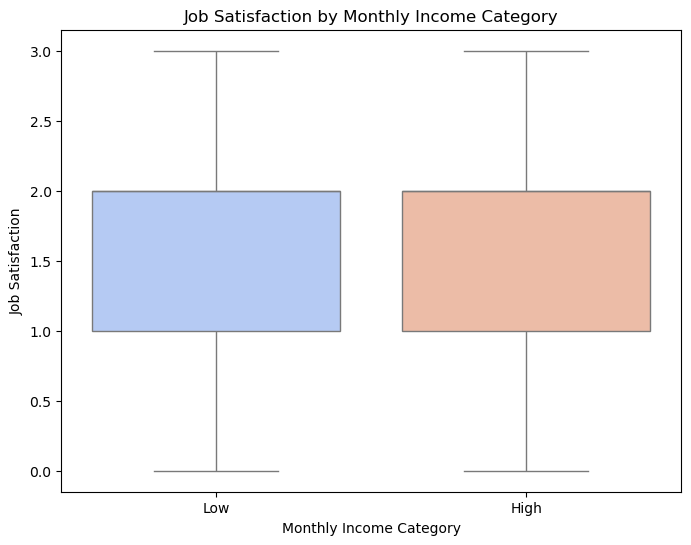

In [37]:
two_sample_test('Monthly Income', df)

Nice! So `Monthly Income` is statistically significant: There is statistical evidence that the mean `Job Satisfaction` differs for high and low `Monthly Income` groups

Now we will look at `Distance from Home`

T-statistic: 0.6297259106309562
P-value: 0.5288763411841002
The difference in mean Job Satisfaction between the two Distance from Home groups is not statistically significant.


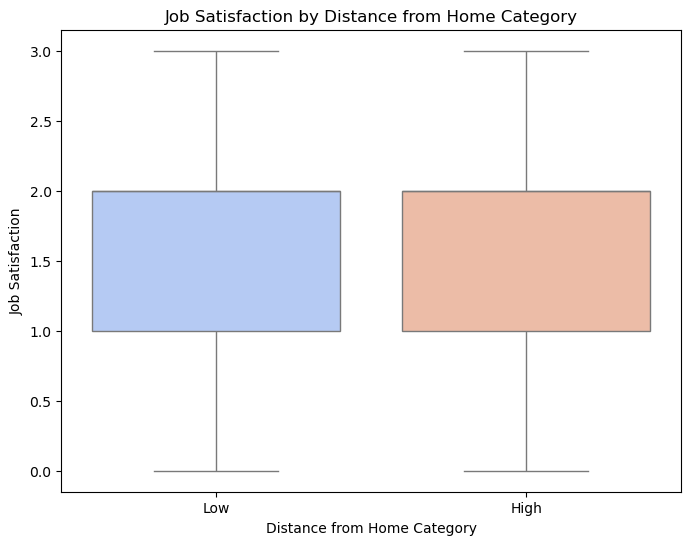

In [38]:
two_sample_test('Distance from Home', df)

So `Distance from Home` is not statistically significant: There is no statistical evidence that the mean `Job Satisfaction` differs for high and low `Distance from Home` groups

### Chi-Square Testing

Reusable Function

In [39]:
def chi_sq(col, df):
    contingency_table = pd.crosstab(df['Job Satisfaction'], df[col])
    print('Contingency Table:')
    print(contingency_table)
    print('\n')
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")

    if p < 0.05:
        print(f'{col} is statistically significant')
    else:
        print(f'{col} is not statistically significant')

In [40]:
chi_sq('Work-Life Balance', df)

Contingency Table:
Work-Life Balance    -1     0      1     2
Job Satisfaction                          
0                   788  1799   2184  1120
1                  1650  3504   4504  2159
2                  4206  9050  11266  5257
3                  1661  3693   4574  2183


Chi-Square Statistic: 11.445261176185397
P-value: 0.24641816086378412
Work-Life Balance is not statistically significant


In [41]:
chi_sq('Company Size', df)

Contingency Table:
Company Size         0      1     2
Job Satisfaction                   
0                 1764   2953  1174
1                 3559   5946  2312
2                 9051  14829  5899
3                 3561   6017  2533


Chi-Square Statistic: 10.252386244320324
P-value: 0.11441800124563584
Company Size is not statistically significant


In [42]:
chi_sq('Marital_Married', df)

Contingency Table:
Marital_Married   False  True 
Job Satisfaction              
0                  2947   2944
1                  5893   5924
2                 14906  14873
3                  5944   6167


Chi-Square Statistic: 3.428159115596678
P-value: 0.3301998664440246
Marital_Married is not statistically significant


Sadly, none of the three variables are statistically significant

Result is that only `Monthly Income` is significant

## Further analysis: same tests after dividng the data into groups

We will break into 4 parts
1. `Company Size`
2. `Years at Company`
3. `Remote Work`
4. `Age Group`

### `Company Size`

Creating groups

In [43]:
small_company = df[df['Company Size'] == 0]
medium_company = df[df['Company Size'] == 1]
large_company = df[df['Company Size'] == 2]

Two sample testing

In [44]:
datas = [small_company, medium_company, large_company]
data_name= ['small_company', 'medium_company', 'large_company']
features = ['Monthly Income', 'Distance from Home']

for i in range(len(datas)):
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print(f'with feature {feature}:')
        two_sample_test(feature, datas[i], False)
        print()


********************************************************************************
Two Sample Test using data:small_company:
with feature Monthly Income:
T-statistic: -1.65186747093783
P-value: 0.098579078389754
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: 0.7201346869128704
P-value: 0.47145145820590373
The difference in mean Job Satisfaction between the two Distance from Home groups is not statistically significant.

********************************************************************************
Two Sample Test using data:medium_company:
with feature Monthly Income:
T-statistic: -1.1275698975798976
P-value: 0.2595107015526266
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: 0.5749456898695783
P-value: 0.5653323768957876
The difference in mean Job Satisfaction betwee

Chi Square Testing

In [45]:
features = ['Work-Life Balance','Marital_Married']

for i in range(len(datas)):
    print('*' * 80)
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print('\n')
        print('Test results for: ', feature)
        print('*'*40)
        chi_sq(feature, datas[i])

********************************************************************************
********************************************************************************
Two Sample Test using data:small_company:


Test results for:  Work-Life Balance
****************************************
Contingency Table:
Work-Life Balance    -1     0     1     2
Job Satisfaction                         
0                   232   577   616   339
1                   475  1079  1366   639
2                  1232  2849  3408  1562
3                   487  1099  1319   656


Chi-Square Statistic: 11.282950777893932
P-value: 0.2568116404975399
Work-Life Balance is not statistically significant


Test results for:  Marital_Married
****************************************
Contingency Table:
Marital_Married   False  True 
Job Satisfaction              
0                   866    898
1                  1816   1743
2                  4593   4458
3                  1796   1765


Chi-Square Statistic: 1.97242259285404

None are significant

### `Years at Company`

In [46]:
df['Years at Company'].describe()

count    59598.000000
mean        15.753901
std         11.245981
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64

Creating groups

In [47]:
df['Year Group'] = pd.cut(
    df['Years at Company'],
    bins=[0, 13, 23, 51],  # Use min, 50th percentile, 75th percentile, and max
    labels=['Low Tenure', 'Medium Tenure', 'High Tenure'],
    right=True
)

In [48]:
low_year = df[df['Year Group'] == 'Low Tenure']
mid_year = df[df['Year Group'] == 'Medium Tenure']
high_year = df[df['Year Group'] == 'High Tenure']

Two Sample testing

In [49]:
datas = [low_year, mid_year, high_year]
data_name= ['low_year', 'mid_year', 'high_year']
features = ['Monthly Income', 'Distance from Home']

for i in range(len(datas)):
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print(f'with feature {feature}:')
        two_sample_test(feature, datas[i], False)
        print()


********************************************************************************
Two Sample Test using data:low_year:
with feature Monthly Income:
T-statistic: -1.013845414620083
P-value: 0.31066457965639505
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: -0.0547342384879593
P-value: 0.9563505510838162
The difference in mean Job Satisfaction between the two Distance from Home groups is not statistically significant.

********************************************************************************
Two Sample Test using data:mid_year:
with feature Monthly Income:
T-statistic: -2.315339983857
P-value: 0.02060775523793411
The difference in mean Job Satisfaction between the two Monthly Income groups is statistically significant.

with feature Distance from Home:
T-statistic: 0.2495769727273649
P-value: 0.8029179252681597
The difference in mean Job Satisfaction between the two Dista

Chi Square Testing

In [50]:
features = ['Work-Life Balance','Company Size', 'Marital_Married']

for i in range(len(datas)):
    print('*' * 80)
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print('\n')
        print('Test results for: ', feature)
        print('*'*40)
        chi_sq(feature, datas[i])

********************************************************************************
********************************************************************************
Two Sample Test using data:low_year:


Test results for:  Work-Life Balance
****************************************
Contingency Table:
Work-Life Balance    -1     0     1     2
Job Satisfaction                         
0                   417   882  1157   570
1                   843  1813  2302  1054
2                  2201  4609  5727  2657
3                   809  1914  2362  1124


Chi-Square Statistic: 12.482181814820912
P-value: 0.18747020660025668
Work-Life Balance is not statistically significant


Test results for:  Company Size
****************************************
Contingency Table:
Company Size         0     1     2
Job Satisfaction                  
0                  898  1527   601
1                 1834  3006  1172
2                 4590  7589  3015
3                 1824  3072  1313


Chi-Square Statistic:

- `Monthly Income` for Mid Year group is significant
- `Work-Life Balance` for high year group is significant
- `Company Size` for higher year group is significant

### `Remote Work`

In [51]:
no_remote = df[df['Remote Work']==0]
remote = df[df['Remote Work']==1]

Two Sample Testing

In [52]:
datas = [no_remote, remote]
data_name= ['no_remote', 'remote']
features = ['Monthly Income', 'Distance from Home']

for i in range(len(datas)):
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print(f'with feature {feature}:')
        two_sample_test(feature, datas[i], False)
        print()

********************************************************************************
Two Sample Test using data:no_remote:
with feature Monthly Income:
T-statistic: -1.6295967189485037
P-value: 0.10319328785553343
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: 0.27638060620284144
P-value: 0.7822569349311788
The difference in mean Job Satisfaction between the two Distance from Home groups is not statistically significant.

********************************************************************************
Two Sample Test using data:remote:
with feature Monthly Income:
T-statistic: -1.3759653296332068
P-value: 0.16885949957266533
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: 0.8642192786309864
P-value: 0.3874856956944378
The difference in mean Job Satisfaction between the t

Chi Square Testing

In [53]:
features = ['Work-Life Balance','Company Size', 'Marital_Married']

for i in range(len(datas)):
    print('*' * 80)
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print('\n')
        print('Test results for: ', feature)
        print('*'*40)
        chi_sq(feature, datas[i])

********************************************************************************
********************************************************************************
Two Sample Test using data:no_remote:


Test results for:  Work-Life Balance
****************************************
Contingency Table:
Work-Life Balance    -1     0     1     2
Job Satisfaction                         
0                   632  1447  1747   887
1                  1327  2866  3678  1745
2                  3420  7347  9124  4267
3                  1335  2937  3726  1754


Chi-Square Statistic: 8.374889943683456
P-value: 0.4968518349840062
Work-Life Balance is not statistically significant


Test results for:  Company Size
****************************************
Contingency Table:
Company Size         0      1     2
Job Satisfaction                   
0                 1391   2345   977
1                 2941   4806  1869
2                 7304  12085  4769
3                 2845   4862  2045


Chi-Square Stati

- `Company Size` for Remote workers is statistically significant - Chi Square

### `Age Group`

In [54]:
young_adult = df[df['Age Group'] == 'Young Adult']
Adult = df[df['Age Group'] == 'Adult']
Middle_age = df[df['Age Group'] == 'Middle-Aged']
senior = df[df['Age Group'] == 'Senior']

Two Sample Testing

In [55]:
datas = [young_adult, Adult, Middle_age, senior]
data_name= ['young_adult', 'Adult','Middle_age', 'senior']
features = ['Monthly Income', 'Distance from Home']

for i in range(len(datas)):
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print(f'with feature {feature}:')
        two_sample_test(feature, datas[i], False)
        print()

********************************************************************************
Two Sample Test using data:young_adult:
with feature Monthly Income:
T-statistic: -0.9749387041114418
P-value: 0.3296074724429753
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: -0.9256451029512832
P-value: 0.3546463646319885
The difference in mean Job Satisfaction between the two Distance from Home groups is not statistically significant.

********************************************************************************
Two Sample Test using data:Adult:
with feature Monthly Income:
T-statistic: -0.1524985038400754
P-value: 0.8787957469109124
The difference in mean Job Satisfaction between the two Monthly Income groups is not statistically significant.

with feature Distance from Home:
T-statistic: 1.9095390751787311
P-value: 0.05621094957271979
The difference in mean Job Satisfaction between the t

Chi Square Testing

In [56]:
features = ['Work-Life Balance','Company Size', 'Marital_Married']

for i in range(len(datas)):
    print('*' * 80)
    print('*' * 80)
    print(f'Two Sample Test using data:{data_name[i]}:')
    for feature in features:
        print('\n')
        print('Test results for: ', feature)
        print('*'*40)
        chi_sq(feature, datas[i])

********************************************************************************
********************************************************************************
Two Sample Test using data:young_adult:


Test results for:  Work-Life Balance
****************************************
Contingency Table:
Work-Life Balance    -1     0     1     2
Job Satisfaction                         
0                   190   411   524   252
1                   372   850  1070   492
2                  1086  2139  2588  1193
3                   400   879  1075   513


Chi-Square Statistic: 11.498665508109065
P-value: 0.24306908658160203
Work-Life Balance is not statistically significant


Test results for:  Company Size
****************************************
Contingency Table:
Company Size         0     1     2
Job Satisfaction                  
0                  407   716   254
1                  817  1400   567
2                 2141  3513  1352
3                  826  1420   621


Chi-Square Statist

None of the features are significant